In [3]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import contextily as cx

In [4]:
# List of cities
cities = ['vadodara',
 'bengaluru',
 'chandigarh',
 'chennai',
 'pune', 
 'delhi',
 'tiruppur',
 'guwahati',
 'hyderabad',
 'indore',
 'jaipur',
 'kolkata',
 'mumbai',
 'lucknow',
 'mangaluru']

In [ ]:
'''
Code to plot CO2 emissions time series for each city

Note: Place the correct dataset in the data folder
'''
for city in cities:
       # loop through cities
       path = f'data/{city}'
       p2 = f'data/CO2_emissions/{city}'
       # open CO2 emissions data using xarray
       ds = xr.open_dataset(f'{p2}/co2_emission.nc')
       # sum CO2 emissions over all grid cells
       co2_mean = ds.co2.sum(dim=['lat','lon'])
       # convert to pandas dataframe
       df = pd.DataFrame(co2_mean)
       # rename columns
       df.columns = ['co2']
       # add date-time column
       df['DATE-TIME'] = co2_mean.time.values

       # plot CO2 emissions time series
       plt.figure(figsize=(8, 4))
       plt.plot(df['DATE-TIME'], df['co2'], label='Actual',linewidth=1.5,c='purple')
       plt.title(f'{city} CO2 emissions')
       plt.xlabel('Date')
       plt.ylabel('CO2 emissions (tCO2)')
       plt.show()

In [ ]:
'''
Code to plot pollutant emissions bar plot for each city
'''
for city in cities:
       # loop through cities
       path = f'data/{city}'
       p2 = f'data/other_pollutant_emissions/{city}'
       # open pollutant emissions data using xarray
       ds = xr.open_dataset(f'{p2}/poll_emission.nc')
       # sum pollutant emissions over all grid cells
       ds = ds.sum(dim=['lat','lon'])
       # convert to pandas dataframe
       df = ds.to_dataframe()
       # plot pollutant emissions bar plot
       plt.figure(figsize=(8, 4))
       # sum emissions over all time steps and plot
       df.sum().plot(kind='bar',figsize=(8, 4),color='purple')
       plt.xlabel('Pollutants')
       plt.ylabel('Emissions (tons)')
       plt.title(f'{city} Pollutant emissions')

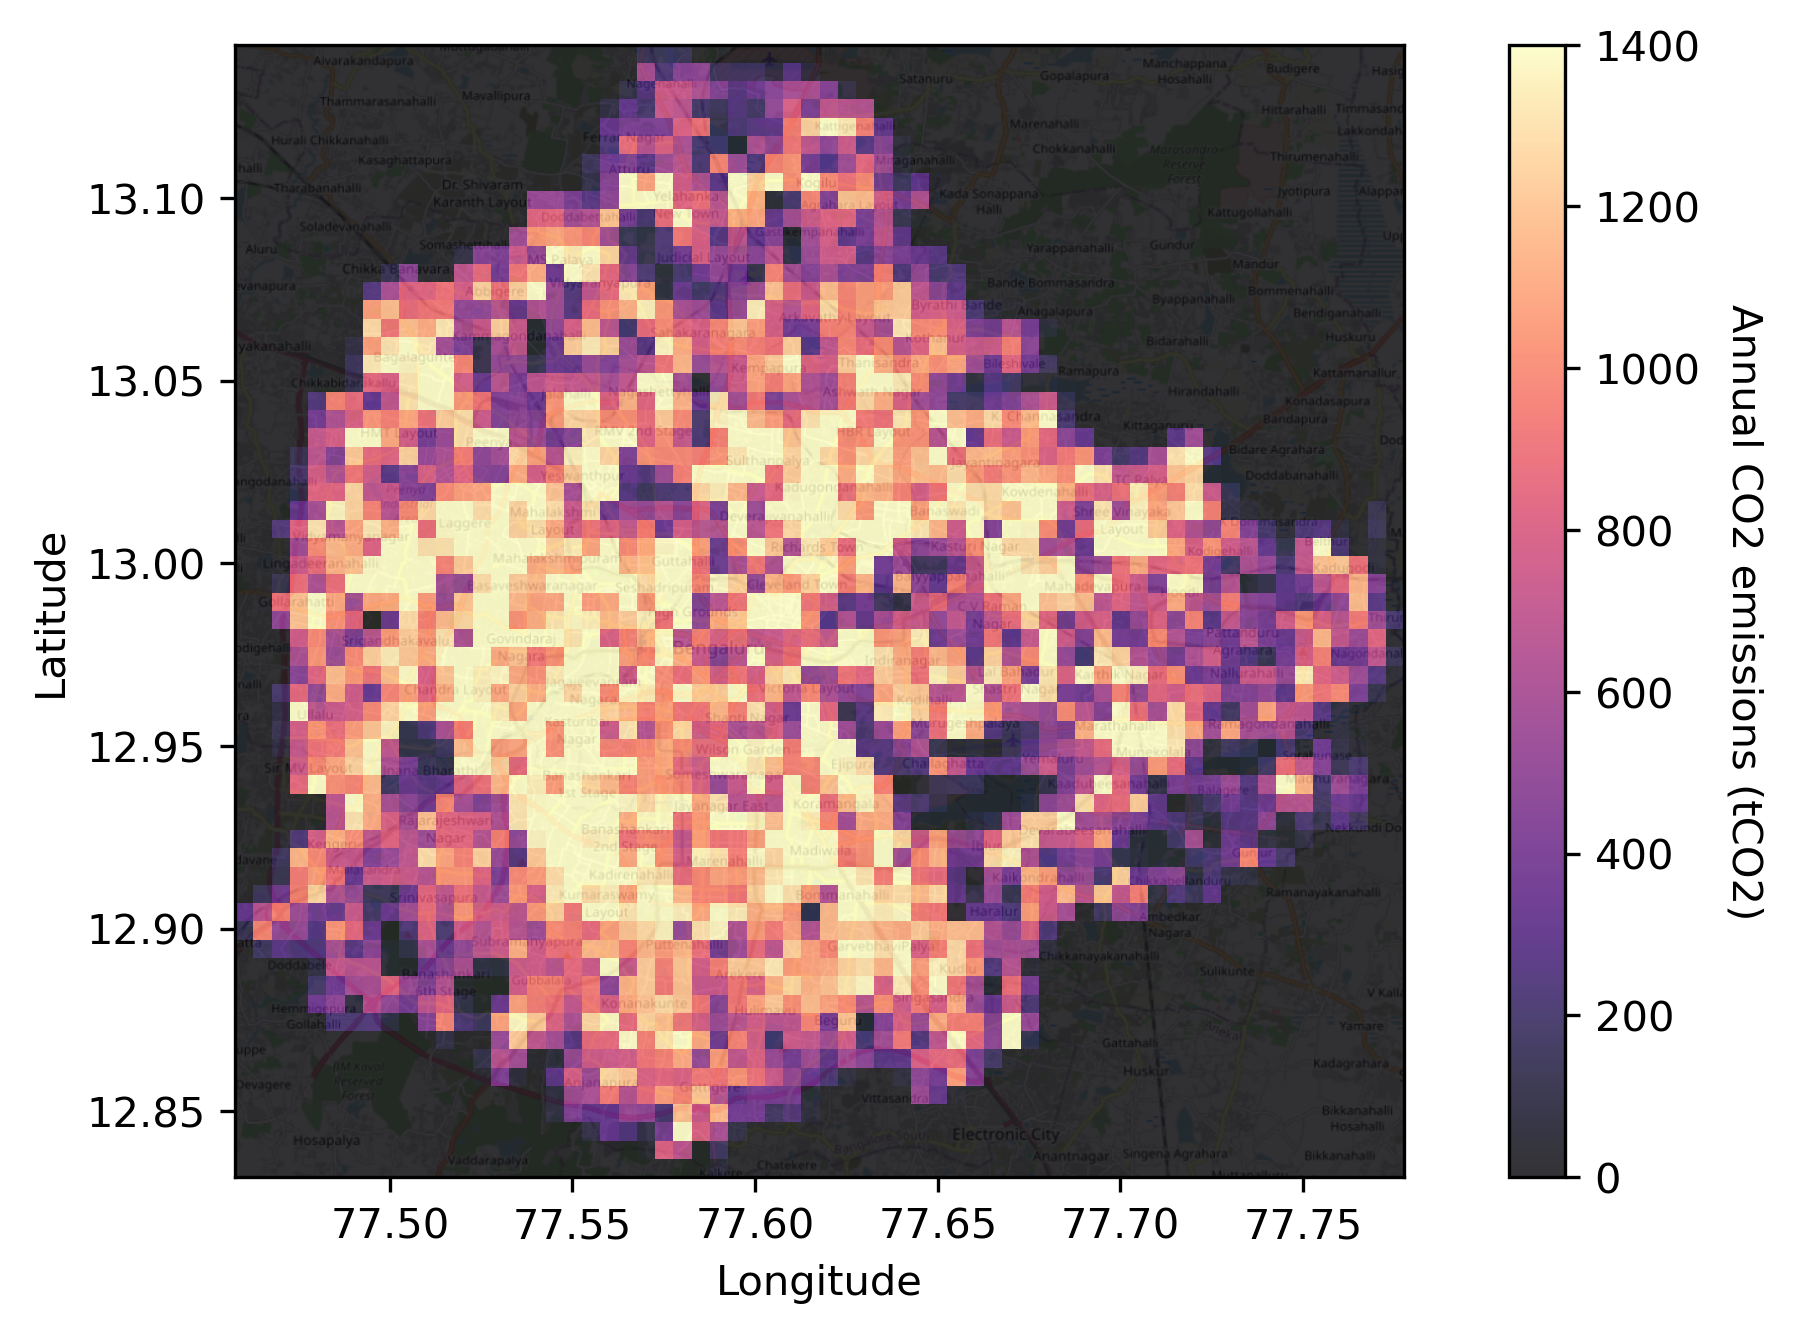

In [28]:
'''
Code to plot spatial distribution of CO2 emissions for a selected city
'''
# select city
city = 'bengaluru'

# Define city and file paths
p2 = f'data/CO2_emissions/{city}'
# Load the NetCDF dataset
ds = xr.open_dataset(f'{p2}/co2_emission.nc')
# Compute the mean CO₂ emissions over time
co2_mean = ds.co2.sum(dim='time')

# Plot the spatial distribution of CO₂ emissions
fig, ax = plt.subplots(figsize=(9, 5), dpi=300)
cax = co2_mean.plot(ax=ax, cmap='magma', alpha=0.8,add_colorbar=False, vmin=0, vmax=1400)
# Add basemap
cx.add_basemap(ax=ax, zoom='auto', crs='EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik, attribution="")

plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add colorbar with legend
cbar = plt.colorbar(cax, ax=ax)
cbar.set_label('Annual CO2 emissions (tCO2)', rotation=270, labelpad=15,fontsize=10)
cbar.ax.tick_params(labelsize=10) 
plt.show()